In [3]:
from typing import TypedDict,List
from langgraph.graph import StateGraph, END
from langchain.prompts import PromptTemplate
from langchain.schema import HumanMessage
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import display, Image

In [4]:
class State(TypedDict):
  text: str
  classification: str
  entities: List[str]
  summary: str

In [6]:
from langchain_groq import ChatGroq

In [8]:
llm = ChatGroq(
    temperature=0,
    groq_api_key = "",
    model_name = "llama-3.3-70b-versatile"
)


In [9]:
def classification_node(state: State):
  "Research, News, Blog or Others"
  prompt = PromptTemplate(
      input_variable = ["text"],
      template = "Classify the following text into one of the categories: News, Blog, Research , or Other. \n\nText:{text}\n\nCategory:"
  )
  message = HumanMessage(content = prompt.format(text = state["text"]))
  classification = llm.invoke([message]).content.strip()
  return {"classification":classification}

In [10]:
def entity_extraction_node(state: State):
  prompt = PromptTemplate(
      input_variables=["text"],
      template = "Extract all the entities (Person, Organization, Location) from the following text. Provide the result as a comma separated list. \n\nText:{text}\n\nEntities:"
  )
  message = HumanMessage(content = prompt.format(text = state["text"]))
  entities = llm.invoke([message]).content.strip().split(", ")
  return {"entities": entities}

In [11]:
def summarization_node(state: State):
  prompt = PromptTemplate(
      input_variable = ["text"],
      template = "Summarize the following text in one short sentence. \n\nText:{text}\n\nSummary:"
  )
  message = HumanMessage(content = prompt.format(text = state["text"]))
  summary = llm.invoke([message]).content.strip()
  return {"summary":summary}

In [12]:
workflow = StateGraph(State)

workflow.add_node("classification_node", classification_node)
workflow.add_node("entity_extraction_node", entity_extraction_node)
workflow.add_node("summarization_node", summarization_node)

workflow.set_entry_point("classification_node")

workflow.add_edge("classification_node", "entity_extraction_node")
workflow.add_edge("entity_extraction_node", "summarization_node")
workflow.add_edge("summarization_node", END)

app = workflow.compile()

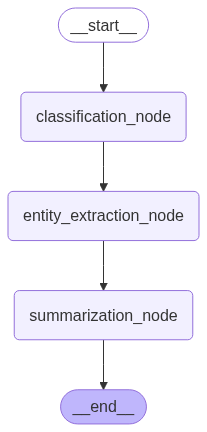

In [13]:
display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API
        )
    )
)

In [14]:
SAMPLE_TEXT = """Joining Apple Computer
Author:	Bill Atkinson
Date:	April 1979
Characters:	Bill Atkinson, Jef Raskin, Steve Jobs, Susan Kare
Topics:	Inspiration, MacPaint, QuickDraw, HyperCard
Summary:	Reflections on the 40th anniversary of my joining Apple

40 years ago today, I joined Apple Computer on April 27, 1978. It was a big turning point in my life and I am glad I said "Yes".

I was working on my PhD in neuroscience with Doug Bowden at the University of Washington Regional Primate Research Center. Jef Raskin, a professor and friend from my undergraduate days at UC San Diego, called and urged me to join him at an exciting new startup called Apple Computer.

I told him I had to finish my PhD, a required credential for researching brains and consciousness. But Jef would not take "No" for an answer, and sent me roundtrip airplane tickets with a note: "Just visit for a weekend, no strings attached." My dad lived in nearby Los Gatos so I decided to visit.

I don't know what Jef told Steve Jobs about me, but Steve spent the entire day recruiting me. He introduced me to all 30 employees at Apple Computer. They seemed intelligent and passionate, and looked like they were having fun, but that was not enough to lure me away from my graduate studies.

Toward the end of the day, Steve took me aside and told me that any hot new technology I read about was actually two years old. "There is a lag time between when someting is invented, and when it is available to the public. If you want to make a difference in the world, you have to be ahead of that lag time. Come to Apple where you can invent the future and change millions of people's lives."

Then he gave me a visual: "Think how fun it is to surf on the front edge of a wave, and how not-fun to dog paddle on the tail edge of the same wave." That image persuaded me, and within two weeks I had quit my graduate program, moved to Silicon Valley, and was working at Apple Computer. I never finished my neuroscience degree, and my dad was mad at me for wasting ten years of college education that he helped to pay for. I was pretty nervous, but knew I had made the right choice.

Steve Jobs and I became close friends. We went for long walks at Castle Rock State Park, shared meals and wide-ranging conversations about life and design. We bounced ideas off each other. Sometimes he would start a conversation with "Here's a crazy idea...", and the idea would go back and forth and evolve into a serious discussion, or occasionally a workable design. Steve listened to me and challenged me. His support at Apple allowed me to made a difference in the world.

I wanted to port the UCSD Pascal system to the Apple II. We needed to build software in a cumulative fashion with libraries of reusable modules, and Apple BASIC didn't even have local variables. My manager said "No", but I went over his head to Steve. Steve thought Apple users were fine with BASIC and 6502 assembly language, but since I argued so passionately, he would give me two weeks to prove him wrong. Within hours I boarded a plane to San Diego, worked like crazy for two weeks, and returned with a working UCSD Pascal System that Apple ended up using to bootstrap the Lisa development.

After the UCSD Pascal system shipped, Steve asked me to work on on Apple's new Lisa project. The Apple II had optional game paddle knobs, but software writers could not count on them because not every user had them. I convinced project manager Tom Whitney that the Lisa computer needed to include a mouse in the box so we could write software that counted on a pointing device. Otherwise a graphics editor would have to be designed to be usable with only cursor keys.

The Apple II displayed white text on a black background. I argued that to do graphics properly we had to switch to a white background like paper. It works fine to invert text when printing, but it would not work for a photo to be printed in negative. The Lisa hardware team complained the screen would flicker too much, and they would need faster refresh with more expensive RAM to prevent smearing when scrolling. Steve listened to all the pros and cons then sided with a white background for the sake of graphics.

The Lisa and Macintosh were designed with full bitmap displays. This gave tremendous flexibility in what you could draw, but at a big cost. There were a lot of pixels to set and clear anytime you wanted to draw a character, line, image, or area. I wrote the optimized assembly language QuickDraw graphics primitives that all Lisa and Macintosh applications called to write the pixels. QuickDraw performance made the bitmap display and graphical user interface practical (see I Still Remember Regions).

To handle overlapping windows and graphics clipping, I wrote the original Lisa Window Manager. I also wrote the Lisa Event Manager and Menu Manager, and invented the pull-down menu. Andy Hertzfeld adapted these for use on the Mac, and with these and QuickDraw, my code accounted for almost two thirds of the original Macintosh ROM.

I had fun writing the MacPaint bitmap painting program that shipped with every Mac (see MacPaint Evolution). I learned a lot from watching Susan Kare using my early versions. MacPaint showed people how fun and creative a computer with a graphics display and a mouse could be.

The portrait of Steve and me was made by Norman Seeff at Steve's home in December 1983, just before the Mac was introduced. Steve's expression looks like he is calculating how to harness this kid's energy. Some say Steve used me, but I say he harnessed and motivated me, and drew out my best creative energy. It was exciting working at Apple, knowing that whatever we invented would be used by millions of people.

The image showing the Mac team is from the cover of Andy Hertzfeld's great little book, "Revolution in the Valley, The Insanely Great Story of How the Mac Was Made." You can also read these stories at Andy's website www.folklore.org.

Inspired by a mind-expanding LSD journey in 1985, I designed the HyperCard authoring system that enabled non-programmers to make their own interactive media. HyperCard used a metaphor of stacks of cards containing graphics, text, buttons, and links that could take you to another card. The HyperTalk scripting language implemented by Dan Winkler was a gentle introduction to event-based programming. Steve Jobs wanted me to leave Apple and join him at Next, but I chose to stay with Apple to finish HyperCard. Apple published HyperCard in 1987, six years before Mosaic, the first web browser.

I worked at Apple for 12 years, making tools to empower creative people, and helping Apple grow from 30 employees to 15,000. In 1990, with John Sculley's blessing, I left Apple with Marc Porat and Andy Hertzfeld to co-found General Magic and help to invent the personal communicator.

The road I took 40 years ago has made all the difference. I still follow research in consciousness, but I am more than satisfied with the contributions I was able to make with my years at Apple. I am grateful to Jef Raskin and Steve Jobs for believing in me and giving me the opportunity to change the world for the better.
 """

state_input = {"text": SAMPLE_TEXT}
result = app.invoke(state_input)

In [15]:
print("Classification :", result["classification"])
print("\nEntities :", result["entities"])
print("\nSummary :", result["summary"])

Classification : Category: Blog 

The text appears to be a personal reflection and memoir written by Bill Atkinson, a former Apple employee, on the 40th anniversary of him joining the company. The writing style is informal and narrative, with a focus on sharing personal anecdotes and experiences, which is typical of a blog post. While the text does contain some historical and technical information, its primary purpose is to share the author's personal story and perspectives, rather than to present research or news.

Entities : ['Bill Atkinson', 'Apple Computer', 'Jef Raskin', 'Steve Jobs', 'Susan Kare', 'University of Washington', 'UC San Diego', 'Los Gatos', 'Silicon Valley', 'Castle Rock State Park', 'Apple II', 'Lisa', 'Macintosh', 'Tom Whitney', 'Andy Hertzfeld', 'Norman Seeff', 'General Magic', 'John Sculley', 'Marc Porat', 'Dan Winkler', 'Next', 'Mosaic', 'Doug Bowden', 'University of Washington Regional Primate Research Center']

Summary : Bill Atkinson reflects on the 40th anni